In [86]:
# Import library yang diperlukan

# Import library yang diperlukan

#Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

#NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

#LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

#KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

#Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

url = '/content/penyakit_ginjal_kronik.csv'

# Membaca dataset
df  = pd.read_csv(url)

df

,id,umur,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [87]:
# Menampilkan data NULL, NA, dan NAN
print("Data dengan nilai NULL, NA, atau NAN:")
print(df[df.isnull().any(axis=1)])

# Menampilkan data duplikasi
print("\nData duplikasi:")
print(df[df.duplicated()])

# Menghapus data NULL, NA, dan NAN
df = df.dropna()

# Menghapus data duplikasi
df = df.drop_duplicates()

# Menampilkan DataFrame setelah dibersihkan
print("\nDataFrame setelah dibersihkan:")
print(df)

Data dengan nilai NULL, NA, atau NAN:
      id  umur  tekanandarah  gravitas  albumin  sugar seldarahmerah  pussel  \
0      0  48.0          80.0     1.020      1.0    0.0           NaN  normal   
1      1   7.0          50.0     1.020      4.0    0.0           NaN  normal   
2      2  62.0          80.0     1.010      2.0    3.0        normal  normal   
4      4  51.0          80.0     1.010      2.0    0.0        normal  normal   
5      5  60.0          90.0     1.015      3.0    0.0           NaN     NaN   
..   ...   ...           ...       ...      ...    ...           ...     ...   
350  350  65.0          70.0     1.025      0.0    0.0           NaN     NaN   
363  363  67.0          80.0     1.025      0.0    0.0        normal  normal   
365  365  24.0          80.0     1.020      0.0    0.0        normal  normal   
378  378  71.0          60.0     1.025      0.0    0.0        normal  normal   
381  381  71.0          70.0     1.025      0.0    0.0           NaN     NaN   

 

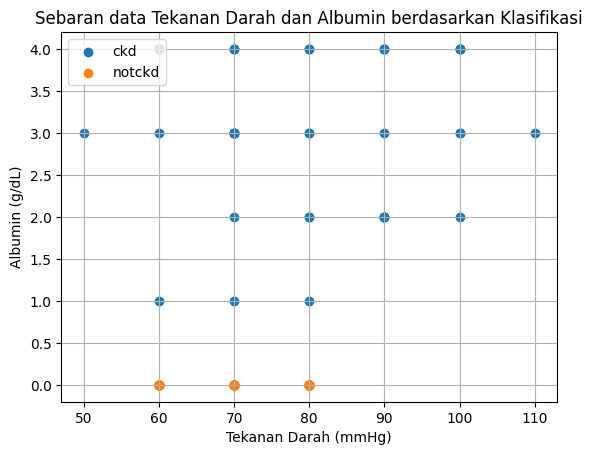

In [89]:
# Visualisasi Data

# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'klasifikasi'
for klasifikasi, d in df.groupby('klasifikasi'):

    # Membuat scatter plot untuk setiap grup
    # x = data 'tekanandarah', y = data 'albumin'
    # 'label=klasifikasi' memberikan label untuk setiap grup (diambil dari nilai kolom 'Outcome')
    ax.scatter(d['tekanandarah'], d['albumin'], label=klasifikasi)

# Menambahkan legenda untuk membedakan grup berdasarkan 'Outcome'
plt.legend(loc='upper left')
# Menambahkan judul pada plot
plt.title('Sebaran data Tekanan Darah dan Albumin berdasarkan Klasifikasi')
# Menambahkan label pada sumbu x (tekanandarah)
plt.xlabel('Tekanan Darah (mmHg)')
# Menambahkan label pada sumbu y (Albumin)
plt.ylabel('Albumin (g/dL)')
# Menambahkan grid untuk mempermudah pembacaan plot
plt.grid(True)
# Menampilkan plot ke layar
plt.show()

In [90]:
# Mengonversi kolom 'tekanandarah' dan 'albumin' dari DataFrame df menjadi array NumPy 2D
# Data ini digunakan sebagai fitur (input) untuk model machine learning
x_train = np.array(df[['tekanandarah', 'albumin']])

# Mengonversi kolom 'klasifikasi' dari DataFrame df menjadi array NumPy 1D
# Data ini digunakan sebagai label (output) untuk model machine learning
y_train = np.array(df['klasifikasi'])

# Mencetak isi x_train (fitur/input) dengan format array NumPy
print(f'x_train:\n{x_train}\n')
# Mencetak isi y_train (label/output) dengan format array NumPy
print(f'y_train: {y_train}')

x_train:
[[ 70.   4.]
 [ 90.   2.]
 [ 70.   3.]
 [ 80.   3.]
 [ 80.   2.]
 [ 80.   4.]
 [ 70.   3.]
 [ 70.   0.]
 [ 80.   2.]
 [ 60.   1.]
 [ 90.   2.]
 [ 80.   4.]
 [ 70.   3.]
 [100.   2.]
 [ 70.   4.]
 [ 70.   3.]
 [100.   3.]
 [ 60.   4.]
 [ 90.   4.]
 [ 90.   2.]
 [100.   4.]
 [ 90.   2.]
 [ 60.   3.]
 [ 90.   2.]
 [ 70.   3.]
 [ 80.   1.]
 [ 70.   3.]
 [ 90.   4.]
 [ 70.   2.]
 [ 60.   4.]
 [ 60.   4.]
 [100.   3.]
 [100.   4.]
 [100.   4.]
 [ 70.   3.]
 [ 80.   3.]
 [ 90.   3.]
 [100.   4.]
 [ 50.   3.]
 [ 70.   4.]
 [110.   3.]
 [ 70.   1.]
 [ 90.   4.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 60.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 60.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 80.   0.]
 [ 60.   0.]
 [ 60.   0.]
 [ 70.   0.]
 [ 80.   0.]
 [ 70.   0.]
 [ 80.   0.]
 [ 70.   0.]
 [ 70.   0.]
 [ 70.   0.]
 [ 80.   0.]
 [ 

In [92]:
# Membuat objek LabelBinarizer, yang digunakan untuk mengonversi label kategori menjadi format biner
lb = LabelBinarizer()

# Menggunakan LabelBinarizer untuk mengonversi y_train (label asli) menjadi format biner
# fit_transform() secara otomatis melakukan dua hal:
# 1. Menyesuaikan LabelBinarizer dengan data (fit)
# 2. Mengonversi data sesuai dengan skema biner (transform)
y_train = lb.fit_transform(y_train)

# Mencetak hasil y_train setelah dikonversi ke format biner
print(f'y_train: \n, {y_train}')

y_train: 
, [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [93]:
# Mengubah array 2D y_train menjadi array 1D menggunakan fungsi flatten()
# Setelah LabelBinarizer, y_train berbentuk array 2D dengan setiap label dalam format biner,
# seperti [[0], [1], [1], ...]. flatten() mengubahnya menjadi [0, 1, 1, ...].
y_train = y_train.flatten()

# Mencetak hasil y_train setelah diubah menjadi array 1D
print(f'y_train: {y_train}')

y_train: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [94]:
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
# n_neighbors menentukan jumlah tetangga yang akan dipertimbangkan dalam proses klasifikasi
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
# prediksi klasifikasi ginjal kronik

# Menetapkan nilai tekanandarah dan albumin untuk data baru
A_tekanandarah = 155
A_albumin = 70

# Membuat array NumPy dengan data baru [A_tekanandarah, A_albumin] dan mengubahnya menjadi array 2D dengan reshape
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
x_new = np.array([[A_tekanandarah, A_albumin]]).reshape(1, -1)

# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
x_new

array([[155,  70]])

In [96]:
# Menggunakan model yang telah dilatih (model) untuk memprediksi label dari data baru (x_new)
# model.predict(x_new) akan mengembalikan hasil prediksi berdasarkan input data baru
y_new = model.predict(x_new)

# Menampilkan hasil prediksi y_new yang berisi label (outcome) untuk data baru
y_new

array([0])

In [98]:
# Menggunakan inverse_transform() dari LabelBinarizer untuk mengonversi hasil prediksi (y_new)
# dari format biner kembali ke label asli.
# Ini diperlukan karena LabelBinarizer mengubah label menjadi format biner selama pelatihan,
# dan kita ingin mengembalikannya ke format aslinya (misalnya, yes atau no).
lb.inverse_transform(y_new)

array([0])

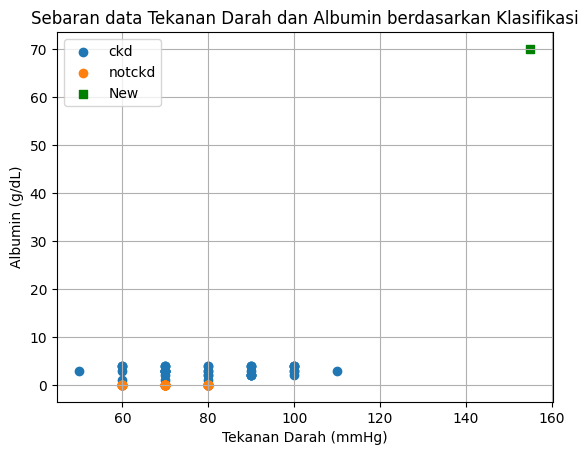

In [99]:
# Membuat figure dan axes untuk plot menggunakan Matplotlib
fig, ax = plt.subplots()

# Melakukan iterasi berdasarkan grup pada DataFrame df yang dikelompokkan berdasarkan kolom 'klasifikasi'
for klasifikasi, d in df.groupby('klasifikasi'):
    # Membuat scatter plot untuk setiap grup
    # x = data 'tekanandarah', y = data 'albumin'
    # 'label='klasifikasi' memberikan label untuk setiap grup (diambil dari nilai kolom 'Outcome')
    ax.scatter(d['tekanandarah'], d['albumin'], label=klasifikasi)

plt.scatter(A_tekanandarah,
            A_albumin,
            marker='s',  # Menandakan titik data baru menggunakan bentuk persegi
            color='green', # Menentukan warna titik data baru menjadi hijau
            label='New')  # Label untuk titik data baru

# Menambahkan legenda, judul, dan label sumbu
plt.legend(loc='upper left')
plt.title('Sebaran data Tekanan Darah dan Albumin berdasarkan Klasifikasi')
plt.xlabel('Tekanan Darah (mmHg)')
plt.ylabel('Albumin (g/dL)')
plt.grid(True)
plt.show()

In [ ]:
# Membuat array NumPy baru dengan data tekanandarah dan albumin (A_albumin)
# Data ini disimpan dalam array 1D yang berisi dua nilai: tekanandarah dan albumin
New = np.array([A_tekanandarah, A_albumin])

# Menampilkan array 'New' yang berisi nilai tekanandarah dan albumin
New

array([155,  70])

In [100]:
x_train

array([[ 70.,   4.],
       [ 90.,   2.],
       [ 70.,   3.],
       [ 80.,   3.],
       [ 80.,   2.],
       [ 80.,   4.],
       [ 70.,   3.],
       [ 70.,   0.],
       [ 80.,   2.],
       [ 60.,   1.],
       [ 90.,   2.],
       [ 80.,   4.],
       [ 70.,   3.],
       [100.,   2.],
       [ 70.,   4.],
       [ 70.,   3.],
       [100.,   3.],
       [ 60.,   4.],
       [ 90.,   4.],
       [ 90.,   2.],
       [100.,   4.],
       [ 90.,   2.],
       [ 60.,   3.],
       [ 90.,   2.],
       [ 70.,   3.],
       [ 80.,   1.],
       [ 70.,   3.],
       [ 90.,   4.],
       [ 70.,   2.],
       [ 60.,   4.],
       [ 60.,   4.],
       [100.,   3.],
       [100.,   4.],
       [100.,   4.],
       [ 70.,   3.],
       [ 80.,   3.],
       [ 90.,   3.],
       [100.,   4.],
       [ 50.,   3.],
       [ 70.,   4.],
       [110.,   3.],
       [ 70.,   1.],
       [ 90.,   4.],
       [ 80.,   0.],
       [ 80.,   0.],
       [ 80.,   0.],
       [ 80.,   0.],
       [ 60.,

In [104]:
# Menghitung jarak Euclidean antara data misterius dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
data_jarak = [euclidean(misterius, d) for d in x_train]

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
data_jarak

[107.61505470890214,
 94.06912352095134,
 108.23123393919151,
 100.56838469419701,
 101.23734488813898,
 99.90495483208028,
 108.23123393919151,
 110.11357772772621,
 101.23734488813898,
 117.41379816699569,
 94.06912352095134,
 99.90495483208028,
 108.23123393919151,
 87.45856161634491,
 107.61505470890214,
 108.23123393919151,
 86.68333173107735,
 115.67627241573788,
 92.63368717696602,
 94.06912352095134,
 85.9127464349732,
 94.06912352095134,
 116.2497311824849,
 94.06912352095134,
 108.23123393919151,
 101.91172650877817,
 108.23123393919151,
 92.63368717696602,
 108.85311203635843,
 115.67627241573788,
 115.67627241573788,
 86.68333173107735,
 85.9127464349732,
 85.9127464349732,
 108.23123393919151,
 100.56838469419701,
 93.34880824091971,
 85.9127464349732,
 124.55520864259351,
 107.61505470890214,
 80.7093550959243,
 109.48059188732951,
 92.63368717696602,
 102.59142264341595,
 102.59142264341595,
 102.59142264341595,
 102.59142264341595,
 118.00423721205946,
 102.591422643415

In [105]:
# Menambahkan kolom baru ke DataFrame 'df' dengan nama 'jarak' yang berisi data jarak Euclidean
# 'data_jarak' adalah list yang berisi jarak Euclidean antara data misterius dan setiap data dalam x_train.
df['jarak'] = data_jarak

# Mengurutkan DataFrame 'df' berdasarkan kolom 'jarak' secara ascending (default)
# Ini akan mengurutkan data berdasarkan jarak terdekat ke data baru (New).
df.sort_values(['jarak'])

,id,umur,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,...,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi,jarak
246,246,48.0,110.0,1.015,3.0,0.0,abnormal,normal,present,notpresent,...,5000,2.5,yes,no,yes,good,no,yes,ckd,80.709355
210,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,9800,3.9,yes,yes,yes,good,no,yes,ckd,85.912746
226,226,64.0,100.0,1.015,4.0,2.0,abnormal,abnormal,notpresent,present,...,7500,3.4,yes,yes,no,good,yes,no,ckd,85.912746
133,133,70.0,100.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,...,\t8400,8,yes,no,no,good,no,no,ckd,85.912746
198,198,59.0,100.0,1.020,4.0,2.0,normal,normal,notpresent,notpresent,...,26400,3.9,yes,yes,no,poor,yes,no,ckd,85.912746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,359,74.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,6000,4.5,no,no,no,good,no,no,notckd,118.004237
360,360,35.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,5800,6.2,no,no,no,good,no,no,notckd,118.004237
254,254,51.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,8300,5.2,no,no,no,good,no,no,notckd,118.004237
367,367,68.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,6700,6.1,no,no,no,good,no,no,notckd,118.004237


In [106]:
# Membuat array NumPy untuk data uji (x_test), yang berisi fitur yang akan diuji oleh model
# Setiap baris dalam 'x_test' berisi dua nilai: tekanandarah dan albumin untuk masing-masing data uji
X_test = np.array([[110, 3], [100, 4], [70, 3], [60, 1]])

# Membuat array NumPy untuk label target uji (y_test), yang berisi hasil untuk masing-masing data uji
# Label target adalah 'yes' atau 'no', yang diubah menjadi format biner menggunakan LabelBinarizer
# Fungsi 'transform()' mengonversi label asli ('Yes' dan 'No') menjadi angka biner (1 untuk 'Yes', 0 untuk 'No')
y_test = lb.transform(np.array(['no', 'yes', 'no', 'yes'])).flatten()

# Menampilkan nilai 'x_test' yang berisi fitur dari data uji (tekanandarah dan albumin)
print(f'X_test:\n{X_test}\n')

# Menampilkan nilai 'y_test' yang berisi label target dalam format biner (0 atau 1)
print(f'y_test:\n{y_test}')

X_test:
[[110   3]
 [100   4]
 [ 70   3]
 [ 60   1]]

y_test:
[0 0 0 0]


In [109]:
# Prediksi terhadap testing set

# Menggunakan model yang telah dilatih untuk membuat prediksi berdasarkan data uji (x_test)
# 'model.predict()' akan memprediksi label target (misalnya, 'Yes' atau 'No') untuk setiap data di 'x_test'
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi yang disimpan dalam variabel 'y_pred'
# 'y_pred' berisi array dengan prediksi model untuk setiap data uji dalam 'x_test'
y_pred

array([0, 0, 0, 1])

In [110]:
# Menghitung akurasi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'accuracy_score()' dari sklearn.metrics akan menghitung persentase prediksi yang benar dari total prediksi
acc = accuracy_score(y_test, y_pred)

# Menampilkan nilai akurasi yang dihitung
# 'acc' berisi nilai akurasi yang menunjukkan seberapa tepat model dalam memprediksi label yang benar
print(f'Accuracy: {acc}')

Accuracy: 0.75


In [111]:
# Menghitung presisi model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'precision_score()' dari sklearn.metrics digunakan untuk menghitung presisi
# Presisi adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh prediksi positif (True Positives + False Positives)
prec = precision_score(y_test, y_pred)

# Menampilkan nilai presisi yang dihitung
# 'prec' berisi nilai presisi yang menunjukkan seberapa akurat model dalam mengklasifikasikan kelas positif (misalnya 'yes')
print(f'Precision: {prec}')

Precision: 0.0


In [112]:
# Menghitung recall (sensitivitas) model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'recall_score()' dari sklearn.metrics digunakan untuk menghitung recall
# Recall adalah rasio antara prediksi positif yang benar (True Positives) dengan seluruh data yang sebenarnya positif (True Positives + False Negatives)
rec = recall_score(y_test, y_pred)

# Menampilkan nilai recall yang dihitung
# 'rec' berisi nilai recall yang menunjukkan seberapa baik model dalam mendeteksi semua kasus positif
print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
# Menghitung F1 score model dengan membandingkan label yang diprediksi ('y_pred') dengan label yang sebenarnya ('y_test')
# Fungsi 'f1_score()' dari sklearn.metrics digunakan untuk menghitung F1 score
# F1 score adalah rata-rata harmonis antara presisi dan recall, yang memberikan keseimbangan antara keduanya
# Formula F1 score adalah: F1 = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Menampilkan nilai F1 score yang dihitung
# 'f1' berisi nilai F1 score yang menunjukkan keseimbangan antara presisi dan recall untuk model
print(f'F1-Score: {f1}')

F1-Score: 0.0


In [114]:
# Menghitung laporan klasifikasi untuk menilai kinerja model dalam hal presisi, recall, f1 score, dan akurasi
# Fungsi 'classification_report()' dari sklearn.metrics menghasilkan laporan evaluasi yang lebih lengkap
# Laporan ini mencakup metrik-metrik seperti presisi, recall, F1 score, dan support untuk setiap kelas (misalnya, 'yes' dan 'no')
cls_report = classification_report(y_test, y_pred)

# Menampilkan laporan klasifikasi yang dihitung
# 'cls_report' berisi ringkasan metrik evaluasi model yang memberikan informasi detail tentang kinerja model per kelas
print(f'Classification Report: \n{cls_report}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [115]:
# Menghitung Matthews Correlation Coefficient (MCC) untuk menilai kinerja model secara keseluruhan
# Fungsi 'matthews_corrcoef()' dari sklearn.metrics digunakan untuk menghitung MCC
# MCC adalah metrik yang mengukur kualitas prediksi dalam masalah klasifikasi biner
# Nilai MCC berkisar antara -1 (prediksi sepenuhnya salah) hingga +1 (prediksi sepenuhnya benar),
# dan nilai 0 menunjukkan prediksi acak atau model yang tidak lebih baik dari tebakan acak
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan nilai MCC yang dihitung
# 'mcc' berisi nilai Matthews Correlation Coefficient yang menunjukkan seberapa baik model dalam memprediksi kelas positif dan negatif
print(f'MCC: {mcc}')

MCC: 0.0
